# Линейные методы классификации
Шестаков А.В. Майнор по анализу данных 15/03/2016

Сегодня мы рассмотрим следующие темы

1. Задача классификации
2. Методы линейной классификации
3. Регуляризация линейной регрессии и градиентный спуск

## Задача классификации

На прошлом семинаре мы рассматривали модели регрессии - случай, в котором необходимо было предсказать вещественную переменную $y \in \mathbb{R}^n$ (Стоимость автомобиля, стоимость жилья, размер мозга, объемы продаж и тп.)

В задаче классификации переменная $y$ - содержит метку принадлежности к классу, как, например, это было в задаче с наивным байесом - категорию текстов. Частный случай задачи классификации - бинарная классификация $y = \{-1, 1\}$. Например: является ли клиент банка кредитоспособным, доброкачественная ли опухоль, сообщение - SPAM или HAM?

Спрашивается, почему бы нам не взять, да и построить обычную регрессию на метки класса $y$?<br/>
Загрузите [данные](https://www.dropbox.com/s/g3s1drtaxqwthw1/crx.data?dl=0) о кредитовании. Они достаточно сильно анонимизированны и еще не до конца подходят для применения, но сейчас это нам не помешает. Постройте график наблюдений в координатах `y` и `a15`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

%matplotlib inline

Vendor:  Continuum Analytics, Inc.
Package: mkl
Message: trial mode expires in 27 days


In [2]:
df = pd.read_csv('../data/crx.data',index_col=None) 
df.head()

,a1,a2,a3,a4,a5,a6,a7,a8,a9,a10,a11,a12,a13,a14,a15,y
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


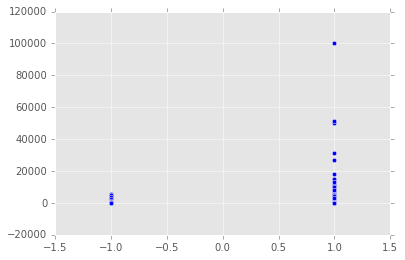

In [4]:
# Your code here
plt.scatter(df.y, df.a15)

Почему бы не обучить по этим данным регрессию, предстказывающую значение $y$? Да потому что это ~~бред~~ не очень корректно!

## Методы линейной классификации

Обратимся к слегка идеализированному варианту, линейно разделимой выборке:

<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/b/b5/Svm_separating_hyperplanes_%28SVG%29.svg/512px-Svm_separating_hyperplanes_%28SVG%29.svg.png'>

Нам надо найти уравнение прямой (гиперплоскости), которая бы могла разделить два класса ($H_2$ и $H_3$ подходят). В данном случае, уравнение прямой задаётся как: $$g(x) = w_0 + w_1x_1 + w_2x_2 = \langle w, x \rangle =  w^\top x$$

* Если $g(x^*) > 0$, то $y^* = \text{'черный'}$
* Если $g(x^*) < 0$, то $y^* = \text{'белый'}$
* Если $g(x^*) = 0$, то мы находимся на линии
* т.е. решающее правило: $y^* = sign(g(x^*))$

Некоторые геометрические особенности
* $\frac{w_0}{||w||}$ - расстояние от начала координат то прямой
* $\frac{|g(x)|}{||w||}$ - степень "уверенности" в классификациий
* Величину $M = y\langle w, x \rangle = y \cdot g(x)$ называют **отступом**(margin)

Если для какого-то объекта $M \geq 0$, то его классификация выполнена успешно.

Отлично! Значит нам надо просто минимизировать ошибки классификации для всех объектов:

$$L(w) = \sum_i [y^{(i)} \langle w, x^{(i)} \rangle < 0] \rightarrow \min_w$$
Проблема в том, что это будет комбинаторная оптимизация. Существуют различные аппроксимации этой функции ошибок:

<img src='http://jaquesgrobler.github.io/Online-Scikit-Learn-stat-tut/_images/plot_sgd_loss_functions_11.png'>

### Знакомьтесь - Перцептрон!

Это самая простая модель человеческой нейронной сети. В ней есть входы, которые взвешиваются и суммируются. Затем взвешенная сумма проходит через некую функцию активации (в данном случае $sign(\cdot)$).

<img src='https://blog.dbrgn.ch/images/2013/3/26/perceptron.png'>

Перцептрон можно использовать для классификации. <br/>
Существует итерационный алгоритм, который корректирует веса $w_0 \cdots w_n$ до тех пор, пока ошибки имею место быть:
 
```python
Randomly initialize weights: w=(w_0, \dots, w_d)
Until no errors on train set:
    for i in xrange(N):
        if y_i * w.T * x  < 0:
            w = w + alpha * y_i * x_i
```
Этот алгоритм гарантированно сходится для линейно разделимой выборки.
А если это не наш случай?

### Знакомьтесь - Линейная регрессия!

Перед тем как мы начнем, рассмотрим функцию $$\sigma(z) = \frac{1}{1 + exp{(-z)}},$$она называется **сигмойда**. Постройте данную фукнцию.

In [5]:
# Your code here


Можно несколькими способами представить линейную регрессию. Один из самых простых - вот какой.

Рассмотрим принадлежность к классу $y=\pm1$ некого объекта $x$: $p(y=\pm1 | x,w)$ и выразим её через **сигмойду** от **отступа**:
$$p(y=\pm1|x,w) = \sigma(y \langle w, x \rangle) $$

Будем максимизировать правдоподобие $$\mathcal{L}(w) = \prod_i p(y^{(i)}|x^{(i)},w) \rightarrow \max_w$$
Возьмем от этого логарифм и поставим минус - получится минимизация логарифмической функции потерь:

$$L(w) = -\sum_i \log(\sigma(y^{(i)} \langle w, x^{(i)} \rangle)) \rightarrow \min_w$$

Посчитаем градиент этой функции потерь по $w$:

$$ \frac{\partial L(w)}{\partial w} = \dots$$

**История с градиентным спуском, регуляризацией, мультиколлинеарностью и шкалированием признаков здесь полностью повторяется!**

Сгенерируем выборку и применим к ней линейную регрессию

In [6]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) + [2, 2],
          np.random.randn(20, 2) + [-2, -2]]
y = [-1] * 20 + [1] * 20

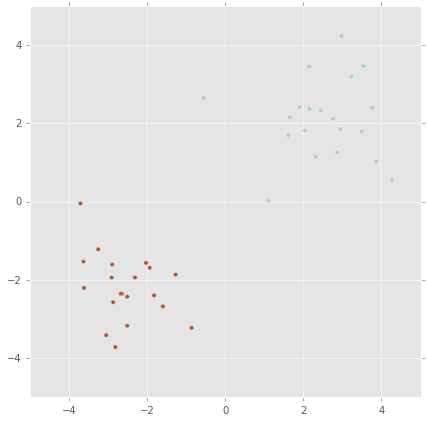

In [10]:
fig, ax = plt.subplots(figsize=(7, 7))
ax.scatter(X[:, 0],
           X[:, 1],
           c=y,
           cmap=plt.cm.Paired)

In [8]:
from sklearn.linear_model import LogisticRegression

Обучите LogisticRegression() на данных `X` и `y`, изобразите разделяющую прямую

In [ ]:
model = LogisticRegression()
## Your code here